In [5]:
from normal_equation import normal_equation
from gradient_descent import gradient_descent
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generating small set of data with Gaussian noise added

In [88]:
x = 10 * np.random.rand(100, 1)
y = 5 + 3 * x + np.random.randn(100, 1)

Let's show generated data

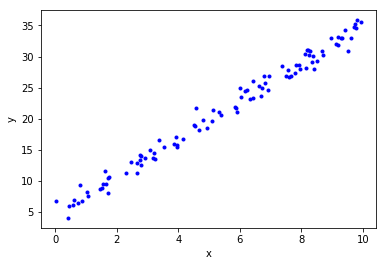

In [89]:
plt.plot(x, y, 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Let's use Normal Equation

In [97]:
theta_best = normal_equation(x, y)

Normal Equation is given by the formula
\begin{align}
\mathbf{w} = (X^T X)^{-1} X^T \mathbf{y}
\end{align}


Now we choose two points to draw the line given by Normal Equation

In [91]:
x_test = np.array([0, 10])
x_test_biased = np.c_[np.ones((len(x_test), 1)), x_test]
y_predict = x_test_biased.dot(theta_best)
y_predict

array([[ 4.79628931],
       [35.04135627]])

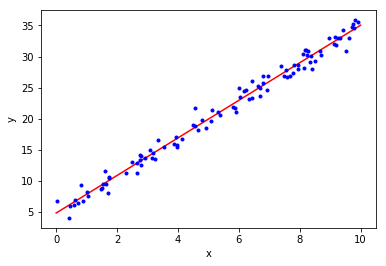

In [92]:
plt.plot(x_test, y_predict, "r-")
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Let's use Gradient Descent

In [93]:
theta_best_gdsc = gradient_descent(x, y, learning_rate=0.01, number_of_iter=1000)
y_predict_gdsc = x_test_biased.dot(theta_best_gdsc)
y_predict_gdsc

array([[ 4.17331141],
       [35.31364182]])

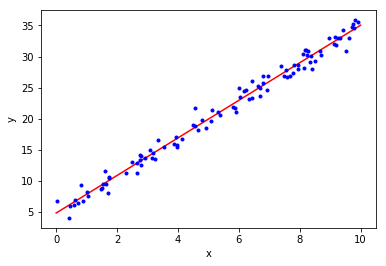

In [94]:
plt.plot(x_test, y_predict, "r-")
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try finding best parameters for Gradient Descent 

In [95]:
thetas = []
for index, learning_rate in enumerate([np.round(0.1**i, i) for i in range(2, 6)]):
    thetas.append([])
    for number_of_iter in [10**i for i in range(2, 6)]:
        tmp = gradient_descent(x, y, learning_rate, number_of_iter)
        thetas[index].append([learning_rate, number_of_iter, tmp])

Let's find the best solution

In [96]:
for batch in thetas:
    print(batch)

[[0.01, 100, array([[-0.21347747],
       [ 3.74444573]])], [0.01, 1000, array([[4.27081189],
       [3.10002153]])], [0.01, 10000, array([[4.7962893],
       [3.0245067]])], [0.01, 100000, array([[4.79628931],
       [3.0245067 ]])]]
[[0.001, 100, array([[0.9924413 ],
       [3.47027319]])], [0.001, 1000, array([[1.70302904],
       [3.46903015]])], [0.001, 10000, array([[4.27975848],
       [3.09873584]])], [0.001, 100000, array([[4.7962893],
       [3.0245067]])]]
[[0.0001, 100, array([[0.92863385],
       [1.08232533]])], [0.0001, 1000, array([[1.08552516],
       [3.4703488 ]])], [0.0001, 10000, array([[1.1425103 ],
       [3.54958067]])], [0.0001, 100000, array([[4.37353636],
       [3.0852593 ]])]]
[[1e-05, 100, array([[-0.45658924],
       [-1.32195938]])], [1e-05, 1000, array([[-0.39225371],
       [ 0.67616591]])], [1e-05, 10000, array([[0.92577285],
       [3.51029295]])], [1e-05, 100000, array([[0.06184842],
       [3.70487945]])]]


The amount of data is sufficiently small. That's why we will simply choose the best result, so the theta that is closest to [4, 3]. As we can see our algorithm was best for learnign_rate = 0.001 and number_of_iter = 10000